In [17]:
from matplotlib.image import imread
import matplotlib.pyplot as plt
import cv2
import os
import random
import skimage.io
from skimage import img_as_float
from skimage.util import random_noise
from cv2 import PSNR
from skimage.metrics import structural_similarity as ssim
import seaborn as sns
import numpy as np
from PIL import Image
from statistics import mean
import numpy as np

from skimage import io, util
from sklearn.feature_extraction import image
from ksvd import ApproximateKSVD

from utils import load_images_from_folder, plot_images, save_noisy_images, mse, showStatistics, showPlots, clip, ksvd_denoise_image

ROOT_DIR = os.path.abspath(".")
ORG_IMAGE_DIR = os.path.join(ROOT_DIR, "original_images")
NOI_IMAGE_DIR = os.path.join(ROOT_DIR, "noisy_images")
DENOI_IMAGE_DIR = os.path.join(ROOT_DIR, "denoisy_images")

In [18]:
original_images, original_filenames = load_images_from_folder(ORG_IMAGE_DIR)

print(f"Successfully uploaded {len(original_images)} images from directory {ORG_IMAGE_DIR}")

Successfully uploaded 12 images from directory C:\Users\szymo\Imgr\obliczeniowe_SI\Projekt\Image-Denoising\original_images


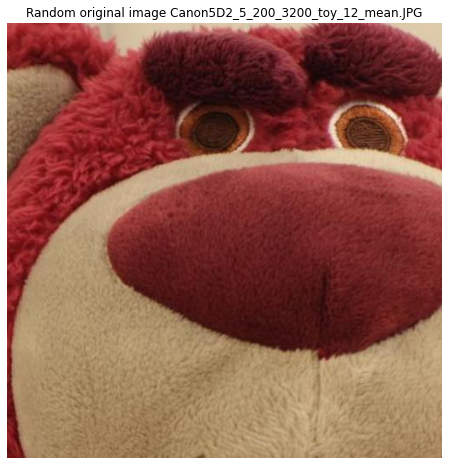

In [20]:
random_org_image = random.choice(original_images)
random_org_filename = None

for file, img in zip(original_filenames, original_images):
    if img is random_org_image:
        random_org_filename = file

plot_images('one', original_filenames, original_images, random_org_image, random_org_filename, 'original')

In [21]:
save_noisy_images(original_filenames, original_images, NOI_IMAGE_DIR)

SIG_004_NOI_DIR = os.path.join(NOI_IMAGE_DIR, "sig004")
SIG_006_NOI_DIR = os.path.join(NOI_IMAGE_DIR, "sig006")
SIG_008_NOI_DIR = os.path.join(NOI_IMAGE_DIR, "sig008")
SIG_01_NOI_DIR = os.path.join(NOI_IMAGE_DIR, "sig01")
SIG_025_NOI_DIR = os.path.join(NOI_IMAGE_DIR, "sig025")
SIG_05_NOI_DIR = os.path.join(NOI_IMAGE_DIR, "sig05")
SIG_1_NOI_DIR = os.path.join(NOI_IMAGE_DIR, "sig1")

noisy_images_004, noisy_filenames_004 = load_images_from_folder(SIG_004_NOI_DIR)
noisy_images_006, noisy_filenames_006 = load_images_from_folder(SIG_006_NOI_DIR)
noisy_images_008, noisy_filenames_008 = load_images_from_folder(SIG_008_NOI_DIR)
noisy_images_01, noisy_filenames_01 = load_images_from_folder(SIG_01_NOI_DIR)
noisy_images_025, noisy_filenames_025 = load_images_from_folder(SIG_025_NOI_DIR)
noisy_images_05, noisy_filenames_05 = load_images_from_folder(SIG_05_NOI_DIR)
noisy_images_1, noisy_filenames_1 = load_images_from_folder(SIG_1_NOI_DIR)

print(f"Successfully uploaded {len(noisy_images_1)} images from directory {SIG_004_NOI_DIR}")
print(f"Successfully uploaded {len(noisy_images_1)} images from directory {SIG_006_NOI_DIR}")
print(f"Successfully uploaded {len(noisy_images_1)} images from directory {SIG_008_NOI_DIR}")
print(f"Successfully uploaded {len(noisy_images_01)} images from directory {SIG_01_NOI_DIR}")
print(f"Successfully uploaded {len(noisy_images_025)} images from directory {SIG_025_NOI_DIR}")
print(f"Successfully uploaded {len(noisy_images_05)} images from directory {SIG_05_NOI_DIR}")
print(f"Successfully uploaded {len(noisy_images_1)} images from directory {SIG_1_NOI_DIR}")

Successfully uploaded 12 images from directory C:\Users\szymo\Imgr\obliczeniowe_SI\Projekt\Image-Denoising\noisy_images\sig004
Successfully uploaded 12 images from directory C:\Users\szymo\Imgr\obliczeniowe_SI\Projekt\Image-Denoising\noisy_images\sig006
Successfully uploaded 12 images from directory C:\Users\szymo\Imgr\obliczeniowe_SI\Projekt\Image-Denoising\noisy_images\sig008
Successfully uploaded 12 images from directory C:\Users\szymo\Imgr\obliczeniowe_SI\Projekt\Image-Denoising\noisy_images\sig01
Successfully uploaded 12 images from directory C:\Users\szymo\Imgr\obliczeniowe_SI\Projekt\Image-Denoising\noisy_images\sig025
Successfully uploaded 12 images from directory C:\Users\szymo\Imgr\obliczeniowe_SI\Projekt\Image-Denoising\noisy_images\sig05
Successfully uploaded 12 images from directory C:\Users\szymo\Imgr\obliczeniowe_SI\Projekt\Image-Denoising\noisy_images\sig1


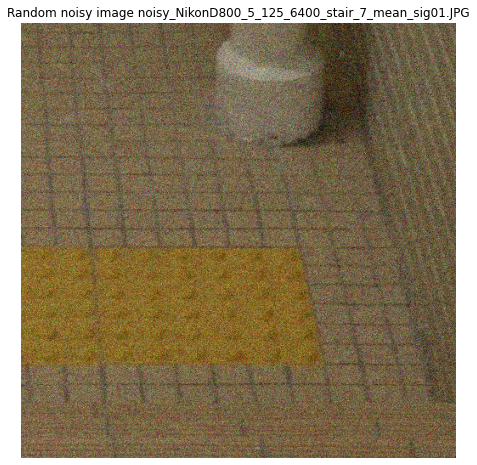

In [6]:
# Display the same random image as original
# random_noisy_image = None
# random_noisy_filename = None

# for file, img in zip(noisy_filenames_01, noisy_images_01):
#     if random_org_filename in file:
#         random_noisy_filename = file
#         random_noisy_image = img

random_noisy_image = random.choice(noisy_images_01)
random_noisy_filename = None

for file, img in zip(noisy_filenames_01, noisy_images_01):
    if img is random_noisy_image:
        random_noisy_filename = file
    
plot_images('one', noisy_filenames_01, noisy_images_01, random_noisy_image, random_noisy_filename, 'noisy')

In [6]:
## Calculate MSE


results_mse_004 = []
results_mse_006 = []
results_mse_008 = []
results_mse_01 = []
results_mse_025 = []
results_mse_05 = []
results_mse_1 = []

for i in range(100):
    result_004 = mse(original_images[i], noisy_images_004[i])
    results_mse_004.append(result_004)
    
    result_006 = mse(original_images[i], noisy_images_006[i])
    results_mse_006.append(result_006)
    
    result_008 = mse(original_images[i], noisy_images_008[i])
    results_mse_008.append(result_008)
    
    result_01 = mse(original_images[i], noisy_images_01[i])
    results_mse_01.append(result_01)
    
    result_025 = mse(original_images[i], noisy_images_025[i])
    results_mse_025.append(result_025)
    
    result_05 = mse(original_images[i], noisy_images_05[i])
    results_mse_05.append(result_05)
    
    result_1 = mse(original_images[i], noisy_images_1[i])
    results_mse_1.append(result_1)

Metryka MSE Dla wartości sigmy = 004 
Ma średnią wynoszącą  0.0014201959078333003 
Maximum wynosi  0.0015375056811269996 
Minimum  0.001044276089725106 

Metryka MSE Dla wartości sigmy = 006 
Ma średnią wynoszącą  0.004348775795155972 
Maximum wynosi  0.0046676758938869675 
Minimum  0.002983001568188168 

Metryka MSE Dla wartości sigmy = 008 
Ma średnią wynoszącą  0.008968473991326577 
Maximum wynosi  0.009849121023351894 
Minimum  0.005943413147418513 

Metryka MSE Dla wartości sigmy = 01 
Ma średnią wynoszącą  0.014674794517907212 
Maximum wynosi  0.016482134580337187 
Minimum  0.009859031433785982 

Metryka MSE Dla wartości sigmy = 025 
Ma średnią wynoszącą  0.07573659842380052 
Maximum wynosi  0.08912794043494385 
Minimum  0.0607764405775235 

Metryka MSE Dla wartości sigmy = 05 
Ma średnią wynoszącą  0.19585186841554797 
Maximum wynosi  0.21201904725130133 
Minimum  0.1890321667475775 

Metryka MSE Dla wartości sigmy = 1 
Ma średnią wynoszącą  0.3429719906048333 
Maximum wynosi  0

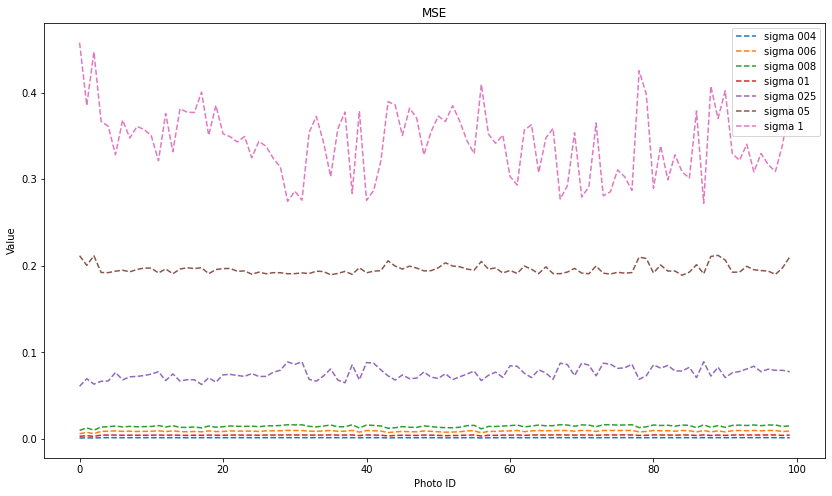

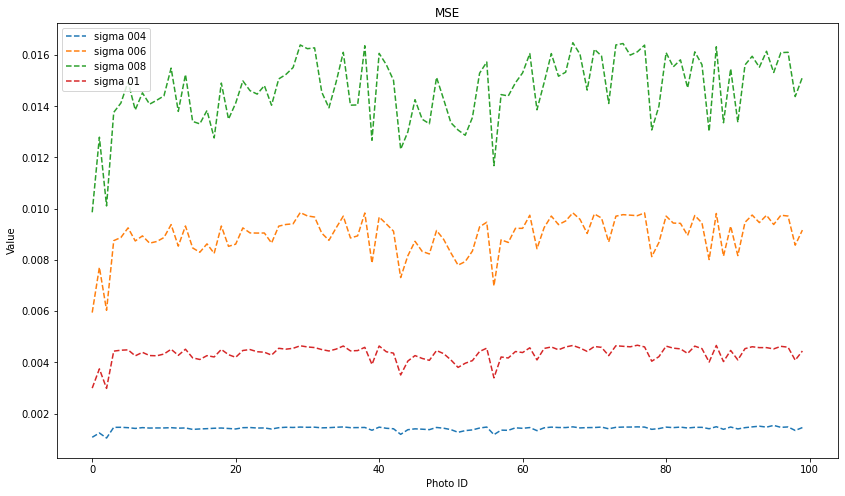

In [7]:
showStatistics("MSE", "004", results_mse_004)
showStatistics("MSE", "006", results_mse_006)
showStatistics("MSE", "008", results_mse_008)
showStatistics("MSE", "01", results_mse_01)
showStatistics("MSE", "025", results_mse_025)
showStatistics("MSE", "05", results_mse_05)
showStatistics("MSE", "1", results_mse_1)

showPlots("MSE", results_mse_004, results_mse_006, results_mse_008, results_mse_01, results_mse_025, results_mse_05, results_mse_1)

In [8]:
## Calculate PSNR

results_psnr_004 = []
results_psnr_006 = []
results_psnr_008 = []
results_psnr_01 = []
results_psnr_025 = []
results_psnr_05 = []
results_psnr_1 = []

for i in range(100):
    result_004 = PSNR(original_images[i], noisy_images_004[i])
    results_psnr_004.append(result_004)
    
    result_006 = PSNR(original_images[i], noisy_images_006[i])
    results_psnr_006.append(result_006)
    
    result_008 = PSNR(original_images[i], noisy_images_008[i])
    results_psnr_008.append(result_008)
    
    result_01 = PSNR(original_images[i], noisy_images_01[i])
    results_psnr_01.append(result_01)
    
    result_025 = PSNR(original_images[i], noisy_images_025[i])
    results_psnr_025.append(result_025)
    
    result_05 = PSNR(original_images[i], noisy_images_05[i])
    results_psnr_05.append(result_05)
    
    result_1 = PSNR(original_images[i], noisy_images_1[i])
    results_psnr_1.append(result_1) 

Metryka PSNR Dla wartości sigmy = 004 
Ma średnią wynoszącą  81.38582609750104 
Maximum wynosi  82.71386281296367 
Minimum  81.03384886406756 

Metryka PSNR Dla wartości sigmy = 006 
Ma średnią wynoszącą  76.53128814487255 
Maximum wynosi  78.15548133913309 
Minimum  76.21100922966421 

Metryka PSNR Dla wartości sigmy = 008 
Ma średnią wynoszącą  73.39181097056886 
Maximum wynosi  75.16165694952868 
Minimum  72.96804141611938 

Metryka PSNR Dla wartości sigmy = 01 
Ma średnią wynoszącą  71.25522860556241 
Maximum wynosi  72.96367364299893 
Minimum  70.7318815965674 

Metryka PSNR Dla wartości sigmy = 025 
Ma średnią wynoszącą  64.12722159265033 
Maximum wynosi  65.06466353914162 
Minimum  63.401877446086615 

Metryka PSNR Dla wartości sigmy = 05 
Ma średnią wynoszącą  59.98438740093705 
Maximum wynosi  60.13665903201036 
Minimum  59.63826736995831 

Metryka PSNR Dla wartości sigmy = 1 
Ma średnią wynoszącą  57.57845553304542 
Maximum wynosi  58.55366152030471 
Minimum  56.2966932472466

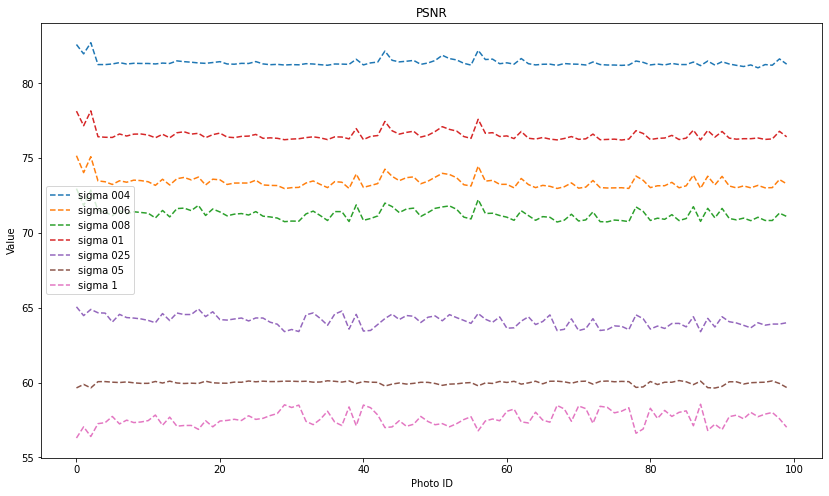

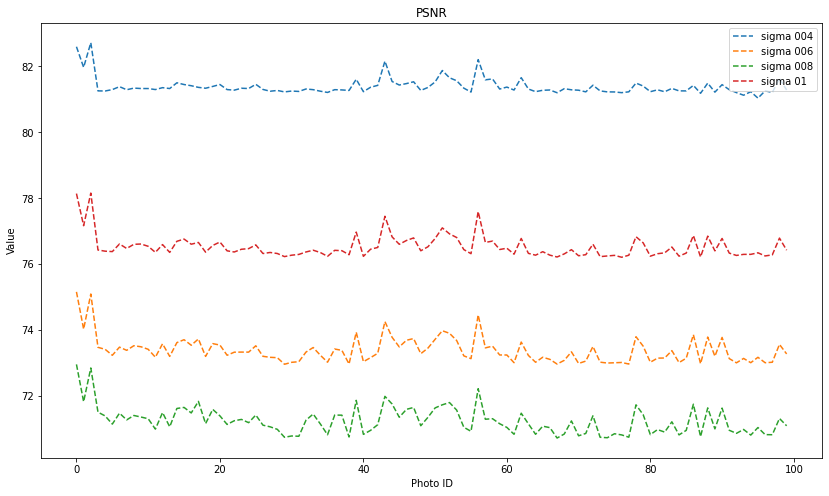

In [9]:
showStatistics("PSNR", "004", results_psnr_004)
showStatistics("PSNR", "006", results_psnr_006)
showStatistics("PSNR", "008", results_psnr_008)
showStatistics("PSNR", "01", results_psnr_01)
showStatistics("PSNR", "025", results_psnr_025)
showStatistics("PSNR", "05", results_psnr_05)
showStatistics("PSNR", "1", results_psnr_1)

showPlots("PSNR", results_psnr_004, results_psnr_006, results_psnr_008, results_psnr_01, results_psnr_025, results_psnr_05, results_psnr_1)

In [10]:
## Calculate SSIM 

results_ssim_004 = []
results_ssim_006 = []
results_ssim_008 = []
results_ssim_01 = []
results_ssim_025 = []
results_ssim_05 = []
results_ssim_1 = []


for i in range(100):
    result_004 = ssim(original_images[i], noisy_images_004[i], multichannel=True)
    results_ssim_004.append(result_004)
    
    result_006 = ssim(original_images[i], noisy_images_006[i], multichannel=True)
    results_ssim_006.append(result_006)
    
    result_008 = ssim(original_images[i], noisy_images_008[i], multichannel=True)
    results_ssim_008.append(result_008)
    
    result_01 = ssim(original_images[i], noisy_images_01[i], multichannel=True)
    results_ssim_01.append(result_01)
    
    result_025 = ssim(original_images[i], noisy_images_025[i], multichannel=True)
    results_ssim_025.append(result_025)
    
    result_05 = ssim(original_images[i], noisy_images_05[i], multichannel=True)
    results_ssim_05.append(result_05)
    
    result_1 = ssim(original_images[i], noisy_images_1[i], multichannel=True)
    results_ssim_1.append(result_1)

Metryka SSIM Dla wartości sigmy = 004 
Ma średnią wynoszącą  0.9047933902558636 
Maximum wynosi  0.9401840599674438 
Minimum  0.8520628795636953 

Metryka SSIM Dla wartości sigmy = 006 
Ma średnią wynoszącą  0.7599745241796332 
Maximum wynosi  0.8403484737778671 
Minimum  0.6702388652712141 

Metryka SSIM Dla wartości sigmy = 008 
Ma średnią wynoszącą  0.6125704571291801 
Maximum wynosi  0.7261525570383967 
Minimum  0.504620685720506 

Metryka SSIM Dla wartości sigmy = 01 
Ma średnią wynoszącą  0.49837967231919506 
Maximum wynosi  0.6314854366063106 
Minimum  0.38479125038210454 

Metryka SSIM Dla wartości sigmy = 025 
Ma średnią wynoszącą  0.17933232681915562 
Maximum wynosi  0.3017649027682547 
Minimum  0.11233950877481864 

Metryka SSIM Dla wartości sigmy = 05 
Ma średnią wynoszącą  0.08003698106663665 
Maximum wynosi  0.17230557627181234 
Minimum  0.042267897017633525 

Metryka SSIM Dla wartości sigmy = 1 
Ma średnią wynoszącą  0.04591153940693384 
Maximum wynosi  0.095710723344344

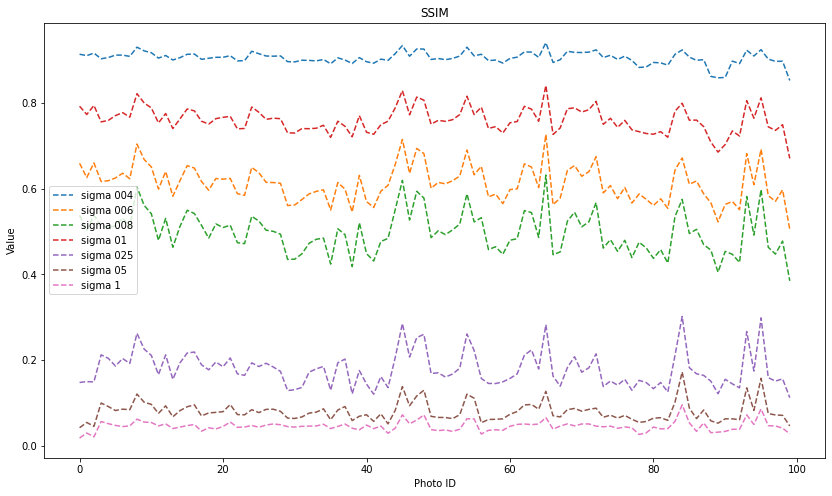

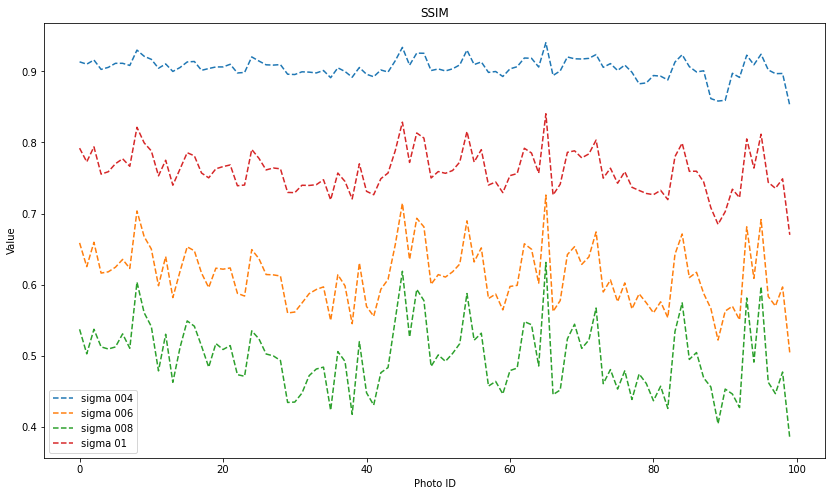

In [11]:
showStatistics("SSIM", "004", results_ssim_004)
showStatistics("SSIM", "006", results_ssim_006)
showStatistics("SSIM", "008", results_ssim_008)
showStatistics("SSIM", "01", results_ssim_01)
showStatistics("SSIM", "025", results_ssim_025)
showStatistics("SSIM", "05", results_ssim_05)
showStatistics("SSIM", "1", results_ssim_1)

showPlots("SSIM", results_ssim_004, results_ssim_006, results_ssim_008, results_ssim_01, results_ssim_025, results_ssim_05, results_ssim_1)

In [25]:
noisy_filenames = [noisy_filenames_004[2], noisy_filenames_006[2], noisy_filenames_008[2], 
                   noisy_filenames_01[2], noisy_filenames_025[2], noisy_filenames_05[2], 
                   noisy_filenames_1[2]]

noisy_dirs = [SIG_004_NOI_DIR, SIG_006_NOI_DIR, SIG_008_NOI_DIR, 
              SIG_01_NOI_DIR, SIG_025_NOI_DIR, SIG_05_NOI_DIR, 
              SIG_1_NOI_DIR]

# print(noisy_filenames_004)

# here we need to add denoise for all images
for filename in noisy_filenames_004:
    ksvd_denoise_image(filename, SIG_004_NOI_DIR, 8)
for filename in noisy_filenames_006:
    ksvd_denoise_image(filename, SIG_006_NOI_DIR, 8)
for filename in noisy_filenames_008:
    ksvd_denoise_image(filename, SIG_008_NOI_DIR, 8)
for filename in noisy_filenames_01:
    ksvd_denoise_image(filename, SIG_01_NOI_DIR, 8)
for filename in noisy_filenames_025:
    ksvd_denoise_image(filename, SIG_025_NOI_DIR, 8)
for filename in noisy_filenames_05:
    ksvd_denoise_image(filename, SIG_05_NOI_DIR, 8)
for filename in noisy_filenames_1:
    ksvd_denoise_image(filename, SIG_1_NOI_DIR, 8)

--- Denoising image noisy_Canon5D2_5_160_3200_chair_5_mean_sig004.JPG ... ---


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


Successfully denoised and saved image denoised_noisy_Canon5D2_5_160_3200_chair_5_mean_sig004.JPG.JPG in 251.05 seconds
--- Denoising image noisy_Canon5D2_5_160_3200_plug_12_mean_sig004.JPG ... ---


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


Successfully denoised and saved image denoised_noisy_Canon5D2_5_160_3200_plug_12_mean_sig004.JPG.JPG in 240.17 seconds
--- Denoising image noisy_Canon5D2_5_160_6400_bicycle_10_mean_sig004.JPG ... ---


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


Successfully denoised and saved image denoised_noisy_Canon5D2_5_160_6400_bicycle_10_mean_sig004.JPG.JPG in 236.19 seconds
--- Denoising image noisy_Canon5D2_5_160_6400_circuit_8_mean_sig004.JPG ... ---


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


Successfully denoised and saved image denoised_noisy_Canon5D2_5_160_6400_circuit_8_mean_sig004.JPG.JPG in 245.99 seconds
--- Denoising image noisy_Canon5D2_5_160_6400_desk_10_mean_sig004.JPG ... ---


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


Successfully denoised and saved image denoised_noisy_Canon5D2_5_160_6400_desk_10_mean_sig004.JPG.JPG in 237.95 seconds
--- Denoising image noisy_Canon5D2_5_160_6400_desk_4_mean_sig004.JPG ... ---


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


Successfully denoised and saved image denoised_noisy_Canon5D2_5_160_6400_desk_4_mean_sig004.JPG.JPG in 243.45 seconds
--- Denoising image noisy_Canon5D2_5_160_6400_desk_5_mean_sig004.JPG ... ---


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


Successfully denoised and saved image denoised_noisy_Canon5D2_5_160_6400_desk_5_mean_sig004.JPG.JPG in 246.21 seconds
--- Denoising image noisy_Canon5D2_5_160_6400_reciever_1_mean_sig004.JPG ... ---


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


Successfully denoised and saved image denoised_noisy_Canon5D2_5_160_6400_reciever_1_mean_sig004.JPG.JPG in 236.4 seconds
--- Denoising image noisy_Canon5D2_5_200_3200_fruit_11_mean_sig004.JPG ... ---


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


Successfully denoised and saved image denoised_noisy_Canon5D2_5_200_3200_fruit_11_mean_sig004.JPG.JPG in 232.17 seconds
--- Denoising image noisy_Canon5D2_5_200_3200_fruit_12_mean_sig004.JPG ... ---


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


Successfully denoised and saved image denoised_noisy_Canon5D2_5_200_3200_fruit_12_mean_sig004.JPG.JPG in 227.77 seconds
--- Denoising image noisy_Canon5D2_5_200_3200_toy_12_mean_sig004.JPG ... ---


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


Successfully denoised and saved image denoised_noisy_Canon5D2_5_200_3200_toy_12_mean_sig004.JPG.JPG in 286.38 seconds
--- Denoising image noisy_Canon5D2_5_200_3200_toy_3_mean_sig004.JPG ... ---


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


Successfully denoised and saved image denoised_noisy_Canon5D2_5_200_3200_toy_3_mean_sig004.JPG.JPG in 262.1 seconds
--- Denoising image noisy_Canon5D2_5_160_3200_chair_5_mean_sig006.JPG ... ---


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


Successfully denoised and saved image denoised_noisy_Canon5D2_5_160_3200_chair_5_mean_sig006.JPG.JPG in 249.33 seconds
--- Denoising image noisy_Canon5D2_5_160_3200_plug_12_mean_sig006.JPG ... ---


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


Successfully denoised and saved image denoised_noisy_Canon5D2_5_160_3200_plug_12_mean_sig006.JPG.JPG in 251.91 seconds
--- Denoising image noisy_Canon5D2_5_160_6400_bicycle_10_mean_sig006.JPG ... ---


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


Successfully denoised and saved image denoised_noisy_Canon5D2_5_160_6400_bicycle_10_mean_sig006.JPG.JPG in 227.92 seconds
--- Denoising image noisy_Canon5D2_5_160_6400_circuit_8_mean_sig006.JPG ... ---


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


Successfully denoised and saved image denoised_noisy_Canon5D2_5_160_6400_circuit_8_mean_sig006.JPG.JPG in 87.03 seconds
--- Denoising image noisy_Canon5D2_5_160_6400_desk_10_mean_sig006.JPG ... ---


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


Successfully denoised and saved image denoised_noisy_Canon5D2_5_160_6400_desk_10_mean_sig006.JPG.JPG in 95.24 seconds
--- Denoising image noisy_Canon5D2_5_160_6400_desk_4_mean_sig006.JPG ... ---


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


Successfully denoised and saved image denoised_noisy_Canon5D2_5_160_6400_desk_4_mean_sig006.JPG.JPG in 94.47 seconds
--- Denoising image noisy_Canon5D2_5_160_6400_desk_5_mean_sig006.JPG ... ---


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


Successfully denoised and saved image denoised_noisy_Canon5D2_5_160_6400_desk_5_mean_sig006.JPG.JPG in 99.41 seconds
--- Denoising image noisy_Canon5D2_5_160_6400_reciever_1_mean_sig006.JPG ... ---


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


Successfully denoised and saved image denoised_noisy_Canon5D2_5_160_6400_reciever_1_mean_sig006.JPG.JPG in 92.95 seconds
--- Denoising image noisy_Canon5D2_5_200_3200_fruit_11_mean_sig006.JPG ... ---


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


Successfully denoised and saved image denoised_noisy_Canon5D2_5_200_3200_fruit_11_mean_sig006.JPG.JPG in 93.53 seconds
--- Denoising image noisy_Canon5D2_5_200_3200_fruit_12_mean_sig006.JPG ... ---


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


Successfully denoised and saved image denoised_noisy_Canon5D2_5_200_3200_fruit_12_mean_sig006.JPG.JPG in 98.21 seconds
--- Denoising image noisy_Canon5D2_5_200_3200_toy_12_mean_sig006.JPG ... ---


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


Successfully denoised and saved image denoised_noisy_Canon5D2_5_200_3200_toy_12_mean_sig006.JPG.JPG in 104.12 seconds
--- Denoising image noisy_Canon5D2_5_200_3200_toy_3_mean_sig006.JPG ... ---


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


Successfully denoised and saved image denoised_noisy_Canon5D2_5_200_3200_toy_3_mean_sig006.JPG.JPG in 94.59 seconds
--- Denoising image noisy_Canon5D2_5_160_3200_chair_5_mean_sig008.JPG ... ---


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


Successfully denoised and saved image denoised_noisy_Canon5D2_5_160_3200_chair_5_mean_sig008.JPG.JPG in 99.67 seconds
--- Denoising image noisy_Canon5D2_5_160_3200_plug_12_mean_sig008.JPG ... ---


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


Successfully denoised and saved image denoised_noisy_Canon5D2_5_160_3200_plug_12_mean_sig008.JPG.JPG in 98.36 seconds
--- Denoising image noisy_Canon5D2_5_160_6400_bicycle_10_mean_sig008.JPG ... ---


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


Successfully denoised and saved image denoised_noisy_Canon5D2_5_160_6400_bicycle_10_mean_sig008.JPG.JPG in 105.96 seconds
--- Denoising image noisy_Canon5D2_5_160_6400_circuit_8_mean_sig008.JPG ... ---


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


Successfully denoised and saved image denoised_noisy_Canon5D2_5_160_6400_circuit_8_mean_sig008.JPG.JPG in 122.01 seconds
--- Denoising image noisy_Canon5D2_5_160_6400_desk_10_mean_sig008.JPG ... ---


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


Successfully denoised and saved image denoised_noisy_Canon5D2_5_160_6400_desk_10_mean_sig008.JPG.JPG in 115.17 seconds
--- Denoising image noisy_Canon5D2_5_160_6400_desk_4_mean_sig008.JPG ... ---


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


Successfully denoised and saved image denoised_noisy_Canon5D2_5_160_6400_desk_4_mean_sig008.JPG.JPG in 106.7 seconds
--- Denoising image noisy_Canon5D2_5_160_6400_desk_5_mean_sig008.JPG ... ---


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


Successfully denoised and saved image denoised_noisy_Canon5D2_5_160_6400_desk_5_mean_sig008.JPG.JPG in 102.2 seconds
--- Denoising image noisy_Canon5D2_5_160_6400_reciever_1_mean_sig008.JPG ... ---


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


Successfully denoised and saved image denoised_noisy_Canon5D2_5_160_6400_reciever_1_mean_sig008.JPG.JPG in 95.67 seconds
--- Denoising image noisy_Canon5D2_5_200_3200_fruit_11_mean_sig008.JPG ... ---


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


Successfully denoised and saved image denoised_noisy_Canon5D2_5_200_3200_fruit_11_mean_sig008.JPG.JPG in 99.99 seconds
--- Denoising image noisy_Canon5D2_5_200_3200_fruit_12_mean_sig008.JPG ... ---


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


Successfully denoised and saved image denoised_noisy_Canon5D2_5_200_3200_fruit_12_mean_sig008.JPG.JPG in 92.83 seconds
--- Denoising image noisy_Canon5D2_5_200_3200_toy_12_mean_sig008.JPG ... ---


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


Successfully denoised and saved image denoised_noisy_Canon5D2_5_200_3200_toy_12_mean_sig008.JPG.JPG in 114.49 seconds
--- Denoising image noisy_Canon5D2_5_200_3200_toy_3_mean_sig008.JPG ... ---


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


Successfully denoised and saved image denoised_noisy_Canon5D2_5_200_3200_toy_3_mean_sig008.JPG.JPG in 107.07 seconds
--- Denoising image noisy_Canon5D2_5_160_3200_chair_5_mean_sig01.JPG ... ---


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


Successfully denoised and saved image denoised_noisy_Canon5D2_5_160_3200_chair_5_mean_sig01.JPG.JPG in 100.86 seconds
--- Denoising image noisy_Canon5D2_5_160_3200_plug_12_mean_sig01.JPG ... ---


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


Successfully denoised and saved image denoised_noisy_Canon5D2_5_160_3200_plug_12_mean_sig01.JPG.JPG in 102.36 seconds
--- Denoising image noisy_Canon5D2_5_160_6400_bicycle_10_mean_sig01.JPG ... ---


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


Successfully denoised and saved image denoised_noisy_Canon5D2_5_160_6400_bicycle_10_mean_sig01.JPG.JPG in 100.15 seconds
--- Denoising image noisy_Canon5D2_5_160_6400_circuit_8_mean_sig01.JPG ... ---


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


Successfully denoised and saved image denoised_noisy_Canon5D2_5_160_6400_circuit_8_mean_sig01.JPG.JPG in 94.21 seconds
--- Denoising image noisy_Canon5D2_5_160_6400_desk_10_mean_sig01.JPG ... ---


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


Successfully denoised and saved image denoised_noisy_Canon5D2_5_160_6400_desk_10_mean_sig01.JPG.JPG in 99.96 seconds
--- Denoising image noisy_Canon5D2_5_160_6400_desk_4_mean_sig01.JPG ... ---


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


Successfully denoised and saved image denoised_noisy_Canon5D2_5_160_6400_desk_4_mean_sig01.JPG.JPG in 96.55 seconds
--- Denoising image noisy_Canon5D2_5_160_6400_desk_5_mean_sig01.JPG ... ---


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


Successfully denoised and saved image denoised_noisy_Canon5D2_5_160_6400_desk_5_mean_sig01.JPG.JPG in 97.47 seconds
--- Denoising image noisy_Canon5D2_5_160_6400_reciever_1_mean_sig01.JPG ... ---


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


Successfully denoised and saved image denoised_noisy_Canon5D2_5_160_6400_reciever_1_mean_sig01.JPG.JPG in 85.08 seconds
--- Denoising image noisy_Canon5D2_5_200_3200_fruit_11_mean_sig01.JPG ... ---


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


Successfully denoised and saved image denoised_noisy_Canon5D2_5_200_3200_fruit_11_mean_sig01.JPG.JPG in 90.52 seconds
--- Denoising image noisy_Canon5D2_5_200_3200_fruit_12_mean_sig01.JPG ... ---


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


Successfully denoised and saved image denoised_noisy_Canon5D2_5_200_3200_fruit_12_mean_sig01.JPG.JPG in 138.93 seconds
--- Denoising image noisy_Canon5D2_5_200_3200_toy_12_mean_sig01.JPG ... ---


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


Successfully denoised and saved image denoised_noisy_Canon5D2_5_200_3200_toy_12_mean_sig01.JPG.JPG in 180.35 seconds
--- Denoising image noisy_Canon5D2_5_200_3200_toy_3_mean_sig01.JPG ... ---


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


Successfully denoised and saved image denoised_noisy_Canon5D2_5_200_3200_toy_3_mean_sig01.JPG.JPG in 86.42 seconds
--- Denoising image noisy_Canon5D2_5_160_3200_chair_5_mean_sig025.JPG ... ---


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


Successfully denoised and saved image denoised_noisy_Canon5D2_5_160_3200_chair_5_mean_sig025.JPG.JPG in 79.68 seconds
--- Denoising image noisy_Canon5D2_5_160_3200_plug_12_mean_sig025.JPG ... ---


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


Successfully denoised and saved image denoised_noisy_Canon5D2_5_160_3200_plug_12_mean_sig025.JPG.JPG in 78.72 seconds
--- Denoising image noisy_Canon5D2_5_160_6400_bicycle_10_mean_sig025.JPG ... ---


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


Successfully denoised and saved image denoised_noisy_Canon5D2_5_160_6400_bicycle_10_mean_sig025.JPG.JPG in 112.72 seconds
--- Denoising image noisy_Canon5D2_5_160_6400_circuit_8_mean_sig025.JPG ... ---


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


Successfully denoised and saved image denoised_noisy_Canon5D2_5_160_6400_circuit_8_mean_sig025.JPG.JPG in 81.13 seconds
--- Denoising image noisy_Canon5D2_5_160_6400_desk_10_mean_sig025.JPG ... ---


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


Successfully denoised and saved image denoised_noisy_Canon5D2_5_160_6400_desk_10_mean_sig025.JPG.JPG in 99.88 seconds
--- Denoising image noisy_Canon5D2_5_160_6400_desk_4_mean_sig025.JPG ... ---


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


Successfully denoised and saved image denoised_noisy_Canon5D2_5_160_6400_desk_4_mean_sig025.JPG.JPG in 104.9 seconds
--- Denoising image noisy_Canon5D2_5_160_6400_desk_5_mean_sig025.JPG ... ---


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


Successfully denoised and saved image denoised_noisy_Canon5D2_5_160_6400_desk_5_mean_sig025.JPG.JPG in 91.51 seconds
--- Denoising image noisy_Canon5D2_5_160_6400_reciever_1_mean_sig025.JPG ... ---


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


Successfully denoised and saved image denoised_noisy_Canon5D2_5_160_6400_reciever_1_mean_sig025.JPG.JPG in 101.54 seconds
--- Denoising image noisy_Canon5D2_5_200_3200_fruit_11_mean_sig025.JPG ... ---


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


Successfully denoised and saved image denoised_noisy_Canon5D2_5_200_3200_fruit_11_mean_sig025.JPG.JPG in 91.43 seconds
--- Denoising image noisy_Canon5D2_5_200_3200_fruit_12_mean_sig025.JPG ... ---


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


Successfully denoised and saved image denoised_noisy_Canon5D2_5_200_3200_fruit_12_mean_sig025.JPG.JPG in 100.55 seconds
--- Denoising image noisy_Canon5D2_5_200_3200_toy_12_mean_sig025.JPG ... ---


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


Successfully denoised and saved image denoised_noisy_Canon5D2_5_200_3200_toy_12_mean_sig025.JPG.JPG in 121.14 seconds
--- Denoising image noisy_Canon5D2_5_200_3200_toy_3_mean_sig025.JPG ... ---


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


Successfully denoised and saved image denoised_noisy_Canon5D2_5_200_3200_toy_3_mean_sig025.JPG.JPG in 105.44 seconds
--- Denoising image noisy_Canon5D2_5_160_3200_chair_5_mean_sig05.JPG ... ---


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


Successfully denoised and saved image denoised_noisy_Canon5D2_5_160_3200_chair_5_mean_sig05.JPG.JPG in 92.93 seconds
--- Denoising image noisy_Canon5D2_5_160_3200_plug_12_mean_sig05.JPG ... ---


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


Successfully denoised and saved image denoised_noisy_Canon5D2_5_160_3200_plug_12_mean_sig05.JPG.JPG in 90.77 seconds
--- Denoising image noisy_Canon5D2_5_160_6400_bicycle_10_mean_sig05.JPG ... ---


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


Successfully denoised and saved image denoised_noisy_Canon5D2_5_160_6400_bicycle_10_mean_sig05.JPG.JPG in 106.19 seconds
--- Denoising image noisy_Canon5D2_5_160_6400_circuit_8_mean_sig05.JPG ... ---


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


Successfully denoised and saved image denoised_noisy_Canon5D2_5_160_6400_circuit_8_mean_sig05.JPG.JPG in 98.77 seconds
--- Denoising image noisy_Canon5D2_5_160_6400_desk_10_mean_sig05.JPG ... ---


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


Successfully denoised and saved image denoised_noisy_Canon5D2_5_160_6400_desk_10_mean_sig05.JPG.JPG in 94.49 seconds
--- Denoising image noisy_Canon5D2_5_160_6400_desk_4_mean_sig05.JPG ... ---


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


Successfully denoised and saved image denoised_noisy_Canon5D2_5_160_6400_desk_4_mean_sig05.JPG.JPG in 88.39 seconds
--- Denoising image noisy_Canon5D2_5_160_6400_desk_5_mean_sig05.JPG ... ---


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


Successfully denoised and saved image denoised_noisy_Canon5D2_5_160_6400_desk_5_mean_sig05.JPG.JPG in 130.69 seconds
--- Denoising image noisy_Canon5D2_5_160_6400_reciever_1_mean_sig05.JPG ... ---


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


Successfully denoised and saved image denoised_noisy_Canon5D2_5_160_6400_reciever_1_mean_sig05.JPG.JPG in 93.67 seconds
--- Denoising image noisy_Canon5D2_5_200_3200_fruit_11_mean_sig05.JPG ... ---


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


Successfully denoised and saved image denoised_noisy_Canon5D2_5_200_3200_fruit_11_mean_sig05.JPG.JPG in 84.88 seconds
--- Denoising image noisy_Canon5D2_5_200_3200_fruit_12_mean_sig05.JPG ... ---


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


Successfully denoised and saved image denoised_noisy_Canon5D2_5_200_3200_fruit_12_mean_sig05.JPG.JPG in 96.83 seconds
--- Denoising image noisy_Canon5D2_5_200_3200_toy_12_mean_sig05.JPG ... ---


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


Successfully denoised and saved image denoised_noisy_Canon5D2_5_200_3200_toy_12_mean_sig05.JPG.JPG in 89.31 seconds
--- Denoising image noisy_Canon5D2_5_200_3200_toy_3_mean_sig05.JPG ... ---


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


Successfully denoised and saved image denoised_noisy_Canon5D2_5_200_3200_toy_3_mean_sig05.JPG.JPG in 97.87 seconds
--- Denoising image noisy_Canon5D2_5_160_3200_chair_5_mean_sig1.JPG ... ---


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


Successfully denoised and saved image denoised_noisy_Canon5D2_5_160_3200_chair_5_mean_sig1.JPG.JPG in 85.78 seconds
--- Denoising image noisy_Canon5D2_5_160_3200_plug_12_mean_sig1.JPG ... ---


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


Successfully denoised and saved image denoised_noisy_Canon5D2_5_160_3200_plug_12_mean_sig1.JPG.JPG in 85.59 seconds
--- Denoising image noisy_Canon5D2_5_160_6400_bicycle_10_mean_sig1.JPG ... ---


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


Successfully denoised and saved image denoised_noisy_Canon5D2_5_160_6400_bicycle_10_mean_sig1.JPG.JPG in 99.71 seconds
--- Denoising image noisy_Canon5D2_5_160_6400_circuit_8_mean_sig1.JPG ... ---


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


Successfully denoised and saved image denoised_noisy_Canon5D2_5_160_6400_circuit_8_mean_sig1.JPG.JPG in 82.71 seconds
--- Denoising image noisy_Canon5D2_5_160_6400_desk_10_mean_sig1.JPG ... ---


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


Successfully denoised and saved image denoised_noisy_Canon5D2_5_160_6400_desk_10_mean_sig1.JPG.JPG in 85.21 seconds
--- Denoising image noisy_Canon5D2_5_160_6400_desk_4_mean_sig1.JPG ... ---


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


Successfully denoised and saved image denoised_noisy_Canon5D2_5_160_6400_desk_4_mean_sig1.JPG.JPG in 108.1 seconds
--- Denoising image noisy_Canon5D2_5_160_6400_desk_5_mean_sig1.JPG ... ---


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


Successfully denoised and saved image denoised_noisy_Canon5D2_5_160_6400_desk_5_mean_sig1.JPG.JPG in 100.51 seconds
--- Denoising image noisy_Canon5D2_5_160_6400_reciever_1_mean_sig1.JPG ... ---


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


Successfully denoised and saved image denoised_noisy_Canon5D2_5_160_6400_reciever_1_mean_sig1.JPG.JPG in 116.4 seconds
--- Denoising image noisy_Canon5D2_5_200_3200_fruit_11_mean_sig1.JPG ... ---


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


Successfully denoised and saved image denoised_noisy_Canon5D2_5_200_3200_fruit_11_mean_sig1.JPG.JPG in 120.65 seconds
--- Denoising image noisy_Canon5D2_5_200_3200_fruit_12_mean_sig1.JPG ... ---


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


Successfully denoised and saved image denoised_noisy_Canon5D2_5_200_3200_fruit_12_mean_sig1.JPG.JPG in 116.23 seconds
--- Denoising image noisy_Canon5D2_5_200_3200_toy_12_mean_sig1.JPG ... ---


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


Successfully denoised and saved image denoised_noisy_Canon5D2_5_200_3200_toy_12_mean_sig1.JPG.JPG in 98.91 seconds
--- Denoising image noisy_Canon5D2_5_200_3200_toy_3_mean_sig1.JPG ... ---


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


Successfully denoised and saved image denoised_noisy_Canon5D2_5_200_3200_toy_3_mean_sig1.JPG.JPG in 79.63 seconds


In [13]:
SIG_004_DENOI_DIR = os.path.join(DENOI_IMAGE_DIR, "sig004")
SIG_006_DENOI_DIR = os.path.join(DENOI_IMAGE_DIR, "sig006")
SIG_008_DENOI_DIR = os.path.join(DENOI_IMAGE_DIR, "sig008")
SIG_01_DENOI_DIR = os.path.join(DENOI_IMAGE_DIR, "sig01")
SIG_025_DENOI_DIR = os.path.join(DENOI_IMAGE_DIR, "sig025")
SIG_05_DENOI_DIR = os.path.join(DENOI_IMAGE_DIR, "sig05")
SIG_1_DENOI_DIR = os.path.join(DENOI_IMAGE_DIR, "sig1")

denoisy_images_004, denoisy_filenames_004 = load_images_from_folder(SIG_004_DENOI_DIR)
denoisy_images_006, denoisy_filenames_006 = load_images_from_folder(SIG_006_DENOI_DIR)
denoisy_images_008, denoisy_filenames_008 = load_images_from_folder(SIG_008_DENOI_DIR)
denoisy_images_01, denoisy_filenames_01 = load_images_from_folder(SIG_01_DENOI_DIR)
denoisy_images_025, denoisy_filenames_025 = load_images_from_folder(SIG_025_DENOI_DIR)
denoisy_images_05, denoisy_filenames_05 = load_images_from_folder(SIG_05_DENOI_DIR)
denoisy_images_1, denoisy_filenames_1 = load_images_from_folder(SIG_1_DENOI_DIR)

print(f"Successfully uploaded {len(denoisy_images_1)} images from directory {SIG_004_DENOI_DIR}")
print(f"Successfully uploaded {len(denoisy_images_1)} images from directory {SIG_006_DENOI_DIR}")
print(f"Successfully uploaded {len(denoisy_images_1)} images from directory {SIG_008_DENOI_DIR}")
print(f"Successfully uploaded {len(denoisy_images_01)} images from directory {SIG_01_DENOI_DIR}")
print(f"Successfully uploaded {len(denoisy_images_025)} images from directory {SIG_025_DENOI_DIR}")
print(f"Successfully uploaded {len(denoisy_images_05)} images from directory {SIG_05_DENOI_DIR}")
print(f"Successfully uploaded {len(denoisy_images_1)} images from directory {SIG_1_DENOI_DIR}")

Successfully uploaded 1 images from directory C:\Users\patry\Documents\STUDIA\MGR\I_SEMESTR\OPSI\projekt\Image-Denoising\denoisy_images\sig004
Successfully uploaded 1 images from directory C:\Users\patry\Documents\STUDIA\MGR\I_SEMESTR\OPSI\projekt\Image-Denoising\denoisy_images\sig006
Successfully uploaded 1 images from directory C:\Users\patry\Documents\STUDIA\MGR\I_SEMESTR\OPSI\projekt\Image-Denoising\denoisy_images\sig008
Successfully uploaded 1 images from directory C:\Users\patry\Documents\STUDIA\MGR\I_SEMESTR\OPSI\projekt\Image-Denoising\denoisy_images\sig01
Successfully uploaded 1 images from directory C:\Users\patry\Documents\STUDIA\MGR\I_SEMESTR\OPSI\projekt\Image-Denoising\denoisy_images\sig025
Successfully uploaded 1 images from directory C:\Users\patry\Documents\STUDIA\MGR\I_SEMESTR\OPSI\projekt\Image-Denoising\denoisy_images\sig05
Successfully uploaded 1 images from directory C:\Users\patry\Documents\STUDIA\MGR\I_SEMESTR\OPSI\projekt\Image-Denoising\denoisy_images\sig1


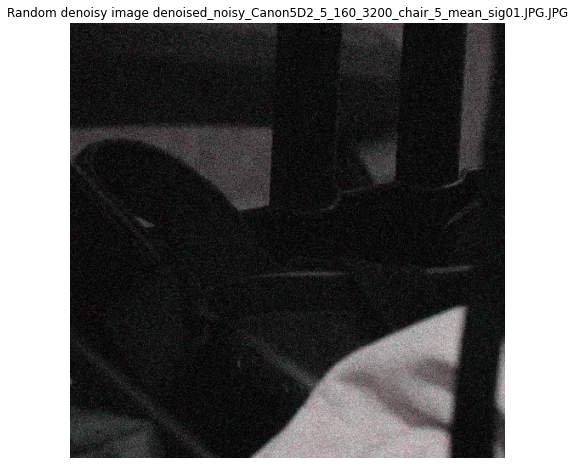

In [14]:
random_denoisy_image = random.choice(denoisy_images_01)
random_denoisy_filename = None

for file, img in zip(denoisy_filenames_01, denoisy_images_01):
    if img is random_denoisy_image:
        random_denoisy_filename = file
    
plot_images('one', denoisy_filenames_01, denoisy_images_01, random_denoisy_image, random_denoisy_filename, 'denoisy')

In [15]:
## Calculate MSE


results_mse_004 = []
results_mse_006 = []
results_mse_008 = []
results_mse_01 = []
results_mse_025 = []
results_mse_05 = []
results_mse_1 = []

# should be for all images
for i in range(len(denoisy_images_004)): 
    result_004 = mse(original_images[i], denoisy_images_004[i])
    results_mse_004.append(result_004)
    
    result_006 = mse(original_images[i], denoisy_images_006[i])
    results_mse_006.append(result_006)
    
    result_008 = mse(original_images[i], denoisy_images_008[i])
    results_mse_008.append(result_008)
    
    result_01 = mse(original_images[i], denoisy_images_01[i])
    results_mse_01.append(result_01)
    
    result_025 = mse(original_images[i], denoisy_images_025[i])
    results_mse_025.append(result_025)
    
    result_05 = mse(original_images[i], denoisy_images_05[i])
    results_mse_05.append(result_05)
    
    result_1 = mse(original_images[i], denoisy_images_1[i])
    results_mse_1.append(result_1)
    
showStatistics("MSE", "004", results_mse_004)
showStatistics("MSE", "006", results_mse_006)
showStatistics("MSE", "008", results_mse_008)
showStatistics("MSE", "01", results_mse_01)
showStatistics("MSE", "025", results_mse_025)
showStatistics("MSE", "05", results_mse_05)
showStatistics("MSE", "1", results_mse_1)

Metryka MSE Dla wartości sigmy = 004 
Ma średnią wynoszącą  0.09641840247271935 
Maximum wynosi  0.09641840247271935 
Minimum  0.09641840247271935 

Metryka MSE Dla wartości sigmy = 006 
Ma średnią wynoszącą  0.0964180601123336 
Maximum wynosi  0.0964180601123336 
Minimum  0.0964180601123336 

Metryka MSE Dla wartości sigmy = 008 
Ma średnią wynoszącą  0.09734753841768305 
Maximum wynosi  0.09734753841768305 
Minimum  0.09734753841768305 

Metryka MSE Dla wartości sigmy = 01 
Ma średnią wynoszącą  0.0983986539740318 
Maximum wynosi  0.0983986539740318 
Minimum  0.0983986539740318 

Metryka MSE Dla wartości sigmy = 025 
Ma średnią wynoszącą  0.12679567775935702 
Maximum wynosi  0.12679567775935702 
Minimum  0.12679567775935702 

Metryka MSE Dla wartości sigmy = 05 
Ma średnią wynoszącą  0.2224320719001722 
Maximum wynosi  0.2224320719001722 
Minimum  0.2224320719001722 

Metryka MSE Dla wartości sigmy = 1 
Ma średnią wynoszącą  0.39981753674093695 
Maximum wynosi  0.39981753674093695 
M

In [16]:
## Calculate SSIM 

results_ssim_004 = []
results_ssim_006 = []
results_ssim_008 = []
results_ssim_01 = []
results_ssim_025 = []
results_ssim_05 = []
results_ssim_1 = []

# should be for all images
for i in range(len(denoisy_images_004)): 
    result_004 = ssim(original_images[i], denoisy_images_004[i], multichannel=True)
    results_ssim_004.append(result_004)
    
    result_006 = ssim(original_images[i], denoisy_images_006[i], multichannel=True)
    results_ssim_006.append(result_006)
    
    result_008 = ssim(original_images[i], denoisy_images_008[i], multichannel=True)
    results_ssim_008.append(result_008)
    
    result_01 = ssim(original_images[i], denoisy_images_01[i], multichannel=True)
    results_ssim_01.append(result_01)
    
    result_025 = ssim(original_images[i], denoisy_images_025[i], multichannel=True)
    results_ssim_025.append(result_025)
    
    result_05 = ssim(original_images[i], denoisy_images_05[i], multichannel=True)
    results_ssim_05.append(result_05)
    
    result_1 = ssim(original_images[i], denoisy_images_1[i], multichannel=True)
    results_ssim_1.append(result_1)
    
showStatistics("SSIM", "004", results_ssim_004)
showStatistics("SSIM", "006", results_ssim_006)
showStatistics("SSIM", "008", results_ssim_008)
showStatistics("SSIM", "01", results_ssim_01)
showStatistics("SSIM", "025", results_ssim_025)
showStatistics("SSIM", "05", results_ssim_05)
showStatistics("SSIM", "1", results_ssim_1)

C:\Users\patry\anaconda3\envs\opsi_project\lib\site-packages\skimage\metrics\_structural_similarity.py:107: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im1.dtype.
  ch_result = structural_similarity(im1[..., ch],


Metryka SSIM Dla wartości sigmy = 004 
Ma średnią wynoszącą  0.6057238789818927 
Maximum wynosi  0.6057238789818927 
Minimum  0.6057238789818927 

Metryka SSIM Dla wartości sigmy = 006 
Ma średnią wynoszącą  0.5804328853300652 
Maximum wynosi  0.5804328853300652 
Minimum  0.5804328853300652 

Metryka SSIM Dla wartości sigmy = 008 
Ma średnią wynoszącą  0.5281069865878972 
Maximum wynosi  0.5281069865878972 
Minimum  0.5281069865878972 

Metryka SSIM Dla wartości sigmy = 01 
Ma średnią wynoszącą  0.4707667301464744 
Maximum wynosi  0.4707667301464744 
Minimum  0.4707667301464744 

Metryka SSIM Dla wartości sigmy = 025 
Ma średnią wynoszącą  0.19314772547107564 
Maximum wynosi  0.19314772547107564 
Minimum  0.19314772547107564 

Metryka SSIM Dla wartości sigmy = 05 
Ma średnią wynoszącą  0.06489740053243358 
Maximum wynosi  0.06489740053243358 
Minimum  0.06489740053243358 

Metryka SSIM Dla wartości sigmy = 1 
Ma średnią wynoszącą  0.029078213998743652 
Maximum wynosi  0.029078213998743

Image similarity 0.7869819291988779


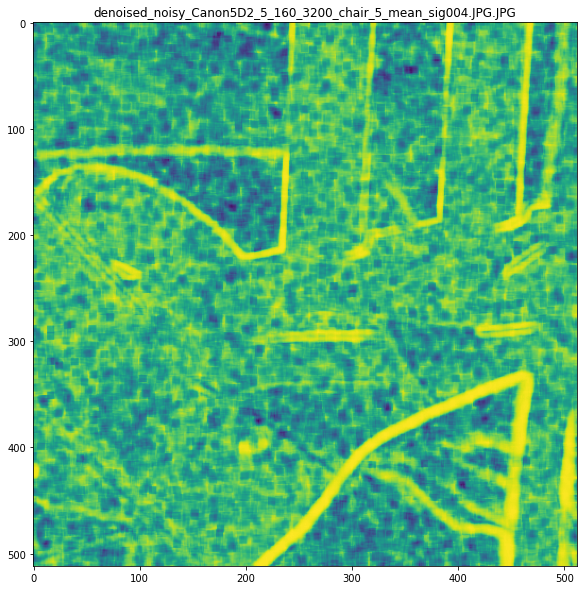

In [17]:
from utils import diff_image
diff_image(original_filenames[2], SIG_004_DENOI_DIR, denoisy_filenames_004[0])